# 4장 CNN(합성곱 신경망)

 ### activation finction

**sigmoid**함수는 binary classification에 적절한 함수인데, sigmoid(시그모이드)는 일정한 값을 기준으로 0인지 1인지를 구분하므로써 분류하는 방식이다.
**Relu**함수는 내부의 hidden layer를 활성화 시키는 함수로 사용되는데, 이 relu함수는 쉽게 말하면 0보다 작은 값이 나온 경우는 0을 반환하고, 0보다 큰 값이 나온 경우는 그 값을 그대로 반환하는 함수이다. 따라서 hidden layer에는 relu를 적용하고 마지막 output layer에만 sigmoid를 적용하면 정확도를 올리는데 유리하다.
**Softmax**함수는 입력받은 값을 출력으로 0~1사이의 값으로 모두 정규화 하여 출력 값들의 총합은 항상 1이되는 특성을 가진 함수로 분류하고 싶은 클래스의 수 만큼 출력으로 구성한다. 가장 큰 출력 값을 부여받은 클래스가 가장 높은 확률을 가지는 것으로 판단함.

### CNN(합성곱)

* 완전 연결층과 합성곱의 차이점
완전 연결층( Dens층)은 입력 특성 공간에 있는 전역 패턴을 학습하지만 합성곱은 지역 패턴을 학습한다.

* 합성곱(CNN)의 특징
1. 완전 연결 네트워크는 새로운 위치에 나타난 것은 새로운 패턴으로 학습하지만, 합성곱(CNN)은 어느 한 부분에서 패턴을 학습했다면 다른 곳에서도 이 패턴을 인식할 수 있다. 이런 성질은 이미지를 효율적으로 처리 가능하게 해 일반화 능력이 좋아진다
2. 컨브넷은 공간적 계층구조를 학습할 수 있다. 첫번째 합성곱이 edge같은 작은 지역 패턴을 학습한다면, 두 번째 합성곱 층은 첫 번째 합성곱 층의 특성으로 구성된 더 큰 패턴을 학습하는 방식이다.

* 케라스의 Conv2D
3D 입력 특성 맵 위를 3x3이나 5x5크기의 윈도우가 슬라이딩하면서 모든 위치에서 3D특성 패치를 추출하는 방식으로 합성곱이 작동한다. (window_height,window_width,input_depth)
보통 3x3이나 5x5를 사용하기 때문에  위아래 좌우로 1개 혹은 2개의 행과 열이 사라진다. 그래서 입력과 동일한 높이와 넓이를 가진 출력 틍성을 얻고 싶다면 **padding**을 사용하면된다. padding은 입력 특성 맵의 가장자리에 적절한 개수의 행과 열을 추가한다. 그래서 모든 입력 타일에 합성곱 윈도우의 중앙을 위치시킬 수 있다.
**padding 매개변수= "vaild"는 패딩 사용x, "same"패딩을 사용한다

* MaxPooling
maxpooling은 특성 맵을 강제적으로 다운샘플링하는 것이다. 입력 특성 맵에서 윈도우에 맞는 패치를 추출하고 각 채널별로 최댓값을 출력한다.이러한 다운 샘플링을 하는 이유는 처리할 특성 맵의 가중치 개수를 줄이기 위해서이다.

In [4]:
from keras import layers
from keras import models

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 32)          18464     
Total params: 37,280
Trainable params: 37,280
Non-trainable params: 0
_________________________________________________________________


In [6]:
import os,shutil

original_dataset_dir='C:/Users/이태민/.kaggle/dogs-vs-cats/train'

In [7]:
base_dir='C:/Users/이태민/.kaggle/dogs-vs-cats/cats_and_dogs_small'

In [8]:
os.mkdir(base_dir)

In [10]:
train_dir=os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir=os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [11]:
train_cats_dir=os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)
train_dogs_dir=os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

In [12]:
validation_cats_dir=os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir=os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

In [13]:
test_cats_dir=os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)
test_dogs_dir=os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

In [15]:
fnames=['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)

In [16]:
fnames=['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)

In [17]:
fnames=['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)

In [19]:
fnames=['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [21]:
fnames=['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [22]:
fnames=['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [24]:
from keras import layers
from keras import models

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 128)      

In [26]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [27]:
from keras.preprocessing.image import ImageDataGenerator

In [29]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator= train_datagen.flow_from_directory(
train_dir,
target_size=(150,150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.


In [30]:
validation_generator= test_datagen.flow_from_directory(
validation_dir,
target_size=(150,150),
batch_size=20,
class_mode='binary')

Found 1000 images belonging to 2 classes.


In [31]:
history= model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)


Epoch 1/30
100/100 [==============================] - 73s 729ms/step - loss: 0.6876 - acc: 0.5440 - val_loss: 0.6331 - val_acc: 0.5610
Epoch 2/30
100/100 [==============================] - 72s 719ms/step - loss: 0.6589 - acc: 0.5950 - val_loss: 0.6943 - val_acc: 0.6030
Epoch 3/30
100/100 [==============================] - 76s 763ms/step - loss: 0.6156 - acc: 0.6560 - val_loss: 0.6407 - val_acc: 0.6120
Epoch 4/30
100/100 [==============================] - 69s 692ms/step - loss: 0.5765 - acc: 0.7000 - val_loss: 0.5350 - val_acc: 0.6630
Epoch 5/30
100/100 [==============================] - 72s 716ms/step - loss: 0.5424 - acc: 0.7295 - val_loss: 0.7331 - val_acc: 0.6830
Epoch 6/30
100/100 [==============================] - 75s 746ms/step - loss: 0.5194 - acc: 0.7500 - val_loss: 0.5941 - val_acc: 0.6930
Epoch 7/30
100/100 [==============================] - 74s 742ms/step - loss: 0.4975 - acc: 0.7510 - val_loss: 0.6798 - val_acc: 0.6850
Epoch 8/30
100/100 [==============================] - 

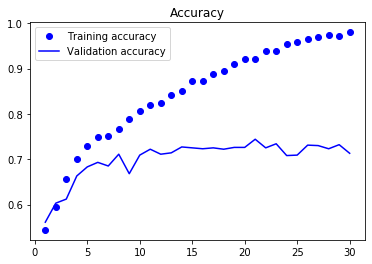

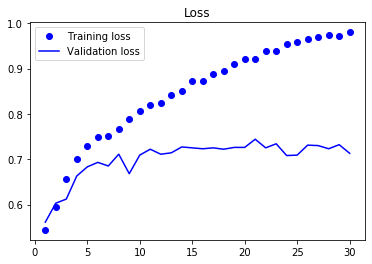

In [32]:
model.save('cats_and_dogs_small_1.h5')

import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,acc,'bo',label='Training loss')
plt.plot(epochs,val_acc,'b',label='Validation loss')
plt.title('Loss')
plt.legend()

plt.show()